Use this cell for all your imports

In [3]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.preprocessing import normalize

You will be working with the file data.txt. Use this cell to load its content into the appropriate data structure.

In [4]:
#import the data from the file data.txt, and since the file is 2 columns format : original node and destination node
#then we will import the data as a list of tlists store in the variable

with open('data.txt', 'r') as f:
    edges = [list(map(int, line.strip().split())) for line in f]

#print a big header because the data is too big it can't be handled by the notebook

print(edges[:5])

#detect the smallest element in the list to know the smallest id node , this will be the first row and column of our matrix

smallest = min([min(t) for t in edges])
print("smallest id value in this matrix is :",smallest)

#detect the largest element in the list to know the largest id node, this will be the last row and column of our matrix

largest= max([max(t) for t in edges])
print("largest id value in this matrix is :",largest)

[[1001, 9304045], [1001, 9308122], [1001, 9309097], [1001, 9311042], [1001, 9401139]]
smallest id value in this matrix is : 1001
largest id value in this matrix is : 9912293


Use this cell to normalize the matrix as you see fit.

In [5]:
data = np.array(edges, dtype=np.int64)
data[:5]
org_arr = data[:, 0] #create nparray of all origins nodes
dest_arr = data[:, 1] #create nparray of all destination nodes

In [6]:
# get the number of nodes
n_nodes = np.max(data) + 1

# create a sparse matrix in CSR format since the matrix is too large and we will always get memory error allocating it
matrix = np.ones(len(data))
transition_matrix = csr_matrix((matrix, (org_arr, dest_arr)), shape=(n_nodes, n_nodes))

In [7]:
# Normalize the rows of the matrix so that they sum up to 1, meaning we want to aqcuire 
# matrix of probabilities of transitions from a state to another
normalized_matrix = normalize(transition_matrix, norm='l1', axis=1)

Apply the PageRank algorithm to the matrix you created.

In [8]:
# Convert the sparse matrix to a networkx graph and use the "from_scipy_sparse_array" because the 
# "from_scipy_sparse_matrix" is no longer available in the 3.0 version
graph = nx.from_scipy_sparse_array(normalized_matrix)

# Compute the PageRank scores of the nodes in the graph
pagerank_scores = nx.pagerank(graph)

Output a list of the 100 most important papers along with their importance

In [9]:
# Sort the papers by PageRank score using a descending order from stronger to weaker score
sorted_papers = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Print the top 100 papers and their PageRank scores and give it a little aesthetic look
for i, paper in enumerate(sorted_papers[:100]):
    print(f" {i+1}. Paper name : {paper[0]} ==> Rate : {np.round(paper[1], 5)}")


 1. Paper name : 9711200 ==> Rate : 1e-05
 2. Paper name : 9407087 ==> Rate : 1e-05
 3. Paper name : 9802150 ==> Rate : 1e-05
 4. Paper name : 9906064 ==> Rate : 1e-05
 5. Paper name : 9908142 ==> Rate : 0.0
 6. Paper name : 9802109 ==> Rate : 0.0
 7. Paper name : 9610043 ==> Rate : 0.0
 8. Paper name : 9408099 ==> Rate : 0.0
 9. Paper name : 9510017 ==> Rate : 0.0
 10. Paper name : 9503124 ==> Rate : 0.0
 11. Paper name : 9905111 ==> Rate : 0.0
 12. Paper name : 9711162 ==> Rate : 0.0
 13. Paper name : 9510209 ==> Rate : 0.0
 14. Paper name : 9204099 ==> Rate : 0.0
 15. Paper name : 9405029 ==> Rate : 0.0
 16. Paper name : 9611050 ==> Rate : 0.0
 17. Paper name : 9510135 ==> Rate : 0.0
 18. Paper name : 9410167 ==> Rate : 0.0
 19. Paper name : 9205068 ==> Rate : 0.0
 20. Paper name : 9210010 ==> Rate : 0.0
 21. Paper name : 9601029 ==> Rate : 0.0
 22. Paper name : 9409089 ==> Rate : 0.0
 23. Paper name : 9401139 ==> Rate : 0.0
 24. Paper name : 9204064 ==> Rate : 0.0
 25. Paper name :

Visualize your results

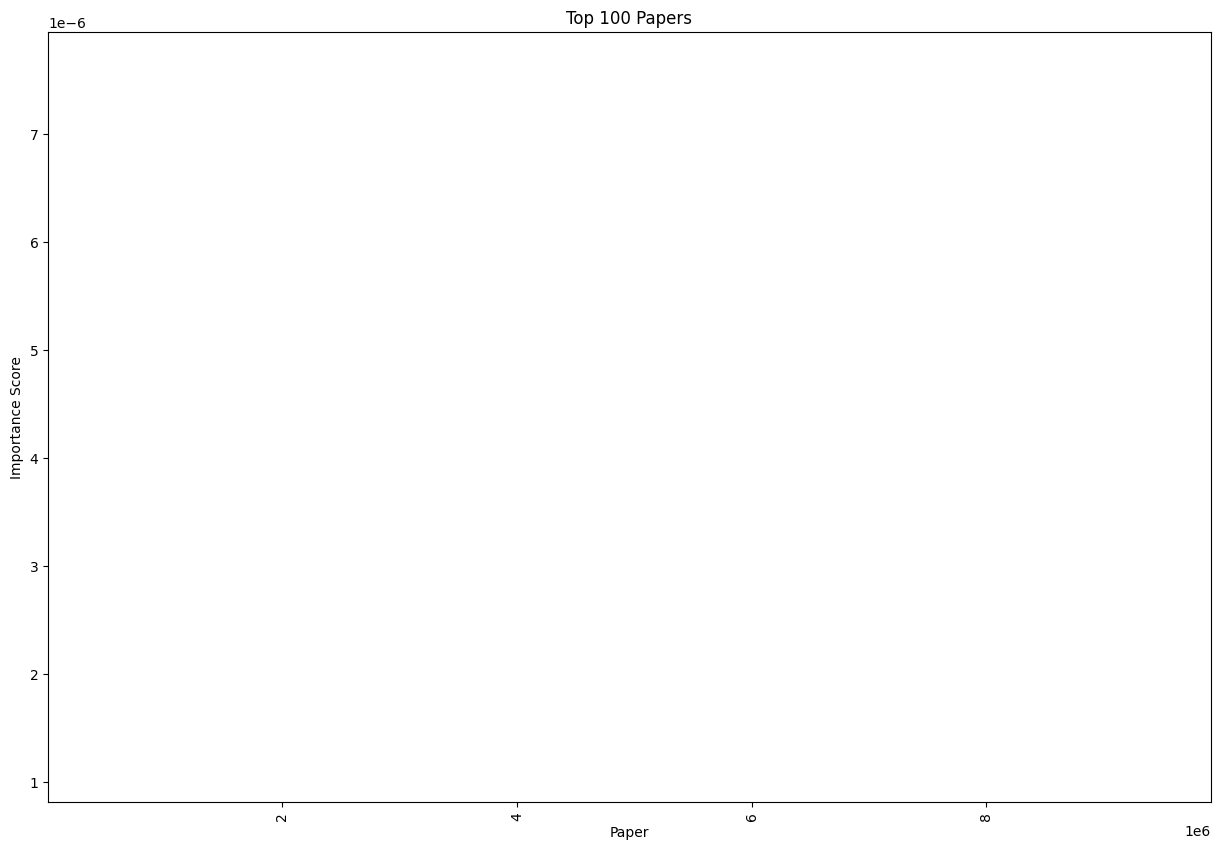

In [15]:
# Since we already have the sorted list we will just take the 100 first element
final_list = sorted_papers[:100]
paper_names = [p[0] for p in final_list]
paper_scores = [p[1] for p in final_list]

#setting limits based on the data by calculating min and max of each array
x_min_lim= min(paper_names)
x_max_lim= max(paper_names)
y_min_lim= min(paper_scores)
y_max_lim= max(paper_scores)

# Create a bar plot of the importance scores
plt.figure(figsize=(15,10))
plt.bar(paper_names, paper_scores , color ='blue')
plt.xlim(x_min_lim , x_max_lim)
plt.ylim(y_min_lim , y_max_lim)
plt.xticks(rotation=90)
plt.xlabel('Paper')
plt.ylabel('Importance Score')
plt.title('Top 100 Papers')
plt.show()
